In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import plotly.graph_objects as go
# import statsmodel


In [8]:
df = pd.read_json('data/cleaned_v1.2.json', lines=True)


In [9]:
df

Address           Suburb    Price  Bedrooms  Bathrooms  \
0            1 Acorn Place       South Lake   565000         4          2   
1              1 Addis Way            Wandi   365000         3          2   
2          1 Ainsley Court          Camillo   287000         3          1   
3          1 Albert Street         Bellevue   255000         2          1   
4             1 Aman Place        Lockridge   325000         4          1   
...                    ...              ...      ...       ...        ...   
28187  9B Teocote Crescent      Aubin Grove   423000         3          2   
28188      9B Viveash Road      Middle Swan   467000         4          2   
28189     9b Wesley Street  South Fremantle   955000         3          2   
28190       9C Gold Street  South Fremantle  1040000         4          3   
28191      9D Shalford Way       Girrawheen   295000         3          1   

       Garage  Land_Area  Floor_Area  Build_Year  Cbd_Dist  \
0           2        600         160        2003      18.3   
1           2        351         139        2013      26.9   
2           1        719          86        1979      22.6   
3           2        651          59        1953      17.9   
4           2        466         131        1998      11.2   
...       ...        ...         ...         ...       ...   
28187       2        248         108        2011      24.9   
28188       2        400         132        2014      17.1   
28189       1        200         127        1997      16.0   
28190       2        292         245        2013      16.1   
28191       2        457          85        1974      12.6   

                    Nearest_Stn  Nearest_Stn_Dist Date_Sold  Postcode  \
0      Cockburn Central Station               1.8   09-2018      6164   
1               Kwinana Station               4.9   02-2019      6167   
2               Challis Station               1.9   06-2015      6111   
3               Midland Station               3.6   07-2018      6056   
4            Bassendean Station               2.0   11-2016      6054   
...                         ...               ...       ...       ...   
28187  Cockburn Central Station               5.7   05-2016      6164   
28188           Midland Station               2.5   04-2015      6056   
28189         Fremantle Station               1.9   02-2019      6162   
28190         Fremantle Station               1.5   03-2016      6162   
28191           Warwick Station               4.4   10-2016      6064   

                         Nearest_Sch  Nearest_Sch_Dist  decade  
0        Lakeland Senior High School               0.8    2000  
1                     Atwell College               5.5    2010  
2       Kelmscott Senior High School               1.6    1970  
3       Swan View Senior High School               1.6    1950  
4                      Kiara College               1.5    1990  
...                              ...               ...     ...  
28187                 Atwell College               3.6    2010  
28188               La Salle College               1.1    2010  
28189              Fremantle College               1.1    1990  
28190    Christian Brothers' College               1.4    2010  
28191  Girrawheen Senior High School               0.4    1970  

[28192 rows x 17 columns]

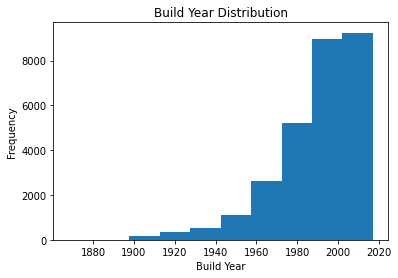

In [10]:
plt.hist(df['Build_Year'], bins=10)
plt.xlabel('Build Year')
plt.ylabel('Frequency')
plt.title('Build Year Distribution')
plt.show()



In [11]:
df = df[df['Build_Year'] >= 1960]


In [12]:
df

Address           Suburb    Price  Bedrooms  Bathrooms  \
0            1 Acorn Place       South Lake   565000         4          2   
1              1 Addis Way            Wandi   365000         3          2   
2          1 Ainsley Court          Camillo   287000         3          1   
4             1 Aman Place        Lockridge   325000         4          1   
5      1 Amethyst Crescent     Mount Richon   409000         4          2   
...                    ...              ...      ...       ...        ...   
28187  9B Teocote Crescent      Aubin Grove   423000         3          2   
28188      9B Viveash Road      Middle Swan   467000         4          2   
28189     9b Wesley Street  South Fremantle   955000         3          2   
28190       9C Gold Street  South Fremantle  1040000         4          3   
28191      9D Shalford Way       Girrawheen   295000         3          1   

       Garage  Land_Area  Floor_Area  Build_Year  Cbd_Dist  \
0           2        600         160        2003      18.3   
1           2        351         139        2013      26.9   
2           1        719          86        1979      22.6   
4           2        466         131        1998      11.2   
5           1        759         118        1991      27.3   
...       ...        ...         ...         ...       ...   
28187       2        248         108        2011      24.9   
28188       2        400         132        2014      17.1   
28189       1        200         127        1997      16.0   
28190       2        292         245        2013      16.1   
28191       2        457          85        1974      12.6   

                    Nearest_Stn  Nearest_Stn_Dist Date_Sold  Postcode  \
0      Cockburn Central Station               1.8   09-2018      6164   
1               Kwinana Station               4.9   02-2019      6167   
2               Challis Station               1.9   06-2015      6111   
4            Bassendean Station               2.0   11-2016      6054   
5              Armadale Station               1.0   03-2013      6112   
...                         ...               ...       ...       ...   
28187  Cockburn Central Station               5.7   05-2016      6164   
28188           Midland Station               2.5   04-2015      6056   
28189         Fremantle Station               1.9   02-2019      6162   
28190         Fremantle Station               1.5   03-2016      6162   
28191           Warwick Station               4.4   10-2016      6064   

                         Nearest_Sch  Nearest_Sch_Dist  decade  
0        Lakeland Senior High School               0.8    2000  
1                     Atwell College               5.5    2010  
2       Kelmscott Senior High School               1.6    1970  
4                      Kiara College               1.5    1990  
5        Armadale Senior High School               1.2    1990  
...                              ...               ...     ...  
28187                 Atwell College               3.6    2010  
28188               La Salle College               1.1    2010  
28189              Fremantle College               1.1    1990  
28190    Christian Brothers' College               1.4    2010  
28191  Girrawheen Senior High School               0.4    1970  

[25887 rows x 17 columns]

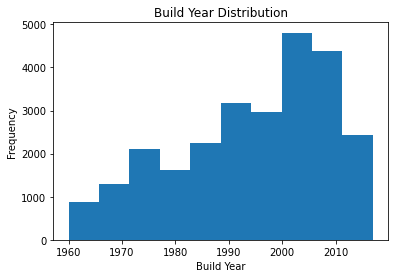

In [13]:
plt.hist(df['Build_Year'], bins=10)
plt.xlabel('Build Year')
plt.ylabel('Frequency')
plt.title('Build Year Distribution')
plt.show()

In [14]:
fig = px.scatter(df, x='Cbd_Dist', y='Price')
fig.update_traces(hovertemplate='Cbd_Dist=%{x}<br>Price=%{y}<br>Suburb=%{text}<br>Bedrooms=%{customdata}', text=df['Suburb'], customdata=df['Bedrooms'])

In [15]:
# Check the correlations against price
df.corr()['Price'].sort_values(ascending=False)

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\3276717462.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Price               1.000000
Floor_Area          0.605225
Bathrooms           0.430696
Bedrooms            0.299019
Garage              0.172659
Land_Area           0.064284
decade              0.021409
Build_Year          0.018644
Nearest_Sch_Dist    0.009119
Nearest_Stn_Dist   -0.057970
Postcode           -0.145058
Cbd_Dist           -0.320893
Name: Price, dtype: float64

In [16]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['Cbd_Dist'].quantile(0.25)
Q3 = df['Cbd_Dist'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame
filtered_df = df[(df['Cbd_Dist'] >= lower_bound) & (df['Cbd_Dist'] <= upper_bound)]

# Step 4: Check the correlation of the filtered DataFrame
correlation = filtered_df.corr()


C:\Users\2much\AppData\Local\Temp\ipykernel_5548\1107599582.py:14: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [17]:
correlation['Price'].sort_values(ascending=False)

Price               1.000000
Floor_Area          0.609230
Bathrooms           0.433852
Bedrooms            0.301327
Garage              0.172859
Land_Area           0.059069
decade              0.026355
Build_Year          0.023795
Nearest_Sch_Dist    0.012048
Nearest_Stn_Dist   -0.046196
Postcode           -0.142334
Cbd_Dist           -0.329473
Name: Price, dtype: float64

In [18]:
# print column names
df.columns

Index(['Address', 'Suburb', 'Price', 'Bedrooms', 'Bathrooms', 'Garage',
       'Land_Area', 'Floor_Area', 'Build_Year', 'Cbd_Dist', 'Nearest_Stn',
       'Nearest_Stn_Dist', 'Date_Sold', 'Postcode', 'Nearest_Sch',
       'Nearest_Sch_Dist', 'decade'],
      dtype='object')

In [19]:
# Assuming 'df' is your DataFrame

# Create the 'Area_Ratio' column
df['Area_Ratio'] = df['Floor_Area'] / df['Land_Area']

# Check the new column
print(df[['Land_Area', 'Floor_Area', 'Area_Ratio']].head())

   Land_Area  Floor_Area  Area_Ratio
0        600         160    0.266667
1        351         139    0.396011
2        719          86    0.119611
4        466         131    0.281116
5        759         118    0.155468


C:\Users\2much\AppData\Local\Temp\ipykernel_5548\212290231.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# Check the correlation of the new column
df.corr()['Price'].sort_values(ascending=False)

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\1407382457.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Price               1.000000
Floor_Area          0.605225
Bathrooms           0.430696
Bedrooms            0.299019
Area_Ratio          0.251161
Garage              0.172659
Land_Area           0.064284
decade              0.021409
Build_Year          0.018644
Nearest_Sch_Dist    0.009119
Nearest_Stn_Dist   -0.057970
Postcode           -0.145058
Cbd_Dist           -0.320893
Name: Price, dtype: float64

In [21]:
# Step 1: Create 'total_rooms' column
df['Total_Rooms'] = df['Bedrooms'] + df['Bathrooms']

# Step 2: Calculate correlation with 'price'
correlation = df[['Total_Rooms', 'Price']].corr()

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\1538054490.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
# Initialize variables to store the best weights and highest correlation found
best_corr = -1  # Start with a correlation that will be lower than any real correlation
best_weights = {'bedrooms': 0, 'bathrooms': 0}

# Define the range of weights to test
weight_range = np.arange(1, 6, 0.5)  # Example: from 1 to 6 in steps of 0.5

# Iterate over all possible combinations of weights within the specified range
for weight_bedroom in weight_range:
    for weight_bathroom in weight_range:
        # Calculate the weighted total rooms
        df['Weighted_Total_Rooms'] = (df['Bedrooms'] * weight_bedroom) + (df['Bathrooms'] * weight_bathroom)
        
        # Calculate the correlation with price
        current_corr = df['Weighted_Total_Rooms'].corr(df['Price'])
        
        # Update the best weights if the current correlation is higher than the best found so far
        if current_corr > best_corr:
            best_corr = current_corr
            best_weights['bedrooms'] = weight_bedroom
            best_weights['bathrooms'] = weight_bathroom

# Output the best weights and the highest correlation found
print(f"Best Weights: Bedrooms = {best_weights['bedrooms']}, Bathrooms = {best_weights['bathrooms']}")
print(f"Highest Correlation with Price: {best_corr}")

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\3082400959.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Best Weights: Bedrooms = 1.0, Bathrooms = 5.5
Highest Correlation with Price: 0.4372238480561707


In [23]:
# Initialize variables to store the best weights and highest correlation found
best_corr = -1  # Start with a correlation that will be lower than any real correlation
best_weights = {'bedrooms': 0, 'bathrooms': 0, 'garage': 0}

# Define the range of weights to test
weight_range = np.arange(1, 6, 0.5)  # Example: from 1 to 6 in steps of 0.5

# Iterate over all possible combinations of weights within the specified range
for weight_bedroom in weight_range:
    for weight_bathroom in weight_range:
        for weight_garage in weight_range:
            # Calculate the weighted total rooms including garage
            df['Weighted_Feature'] = (df['Bedrooms'] * weight_bedroom) + \
                                     (df['Bathrooms'] * weight_bathroom) + \
                                     (df['Garage'] * weight_garage)
            
            # Calculate the correlation with price
            current_corr = df['Weighted_Feature'].corr(df['Price'])
            
            # Update the best weights if the current correlation is higher than the best found so far
            if current_corr > best_corr:
                best_corr = current_corr
                best_weights['bedrooms'] = weight_bedroom
                best_weights['bathrooms'] = weight_bathroom
                best_weights['garage'] = weight_garage

# Output the best weights and the highest correlation found
print(f"Best Weights: Bedrooms = {best_weights['bedrooms']}, Bathrooms = {best_weights['bathrooms']}, Garage = {best_weights['garage']}")
print(f"Highest Correlation with Price: {best_corr}")

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\538345979.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Best Weights: Bedrooms = 1.0, Bathrooms = 5.5, Garage = 1.0
Highest Correlation with Price: 0.43983948192931316


In [24]:
# Assign weights
weight_bedroom = 1
weight_bathroom = 5.5
weight_garage = 1
# Calculate the weighted total rooms feature
df['Weighted_Total_Rooms'] = (df['Bedrooms'] * weight_bedroom) + (df['Bathrooms'] * weight_bathroom) + (df['Garage'] * weight_garage)

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\1202672179.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
# Initialize variables to store the best weights and highest correlation found
best_corr = -np.inf  # Initialize with negative infinity
best_weights = {'Floor_Area': 0, 'Land_Area': 0}

# Define the range of weights to test
weight_range = np.arange(0.1, 5.1, 0.1)  # Adjust as needed

# Iterate over all possible combinations of weights within the specified range
for w_floor in weight_range:
    for w_land in weight_range:
        # Calculate the new weighted area metric
        df['Weighted_Area_Metric'] = (df['Floor_Area'] * w_floor) + (df['Land_Area'] * w_land)
        
        # Calculate the correlation with price
        current_corr = df['Weighted_Area_Metric'].corr(df['Price'])
        
        # Update the best weights if the current correlation is higher than the best found so far
        if current_corr > best_corr:
            best_corr = current_corr
            best_weights['Floor_Area'] = w_floor
            best_weights['Land_Area'] = w_land

# Output the best weights and the highest correlation found
print(f"Best Weights: Floor_Area = {best_weights['Floor_Area']}, Land_Area = {best_weights['Land_Area']}")
print(f"Highest Correlation with Price: {best_corr}")

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\202610870.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Best Weights: Floor_Area = 5.0, Land_Area = 0.1
Highest Correlation with Price: 0.18437729340836403


In [26]:
# Assign weights
w_floor = 0.1
w_land = 5.5
# Calculate the weighted area metric
df['Weighted_Area_Metric'] = (df['Floor_Area'] * w_floor) + (df['Land_Area'] * w_land)


C:\Users\2much\AppData\Local\Temp\ipykernel_5548\2580099393.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
#Check correlation with floor area
df.corr()['Floor_Area'].sort_values(ascending=False)

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\1133951943.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Floor_Area              1.000000
Total_Rooms             0.641576
Weighted_Total_Rooms    0.624704
Price                   0.605225
Bathrooms               0.583779
Weighted_Feature        0.565986
Bedrooms                0.551001
Area_Ratio              0.339496
Build_Year              0.275972
decade                  0.270884
Garage                  0.242395
Nearest_Sch_Dist        0.119574
Nearest_Stn_Dist        0.106539
Weighted_Area_Metric    0.063687
Land_Area               0.063611
Cbd_Dist                0.012261
Postcode               -0.050978
Name: Floor_Area, dtype: float64

In [28]:
# Check the correlation of the new column
df.corr()['Price'].sort_values(ascending=False)

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\1407382457.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Price                   1.000000
Floor_Area              0.605225
Weighted_Total_Rooms    0.439839
Bathrooms               0.430696
Total_Rooms             0.405399
Weighted_Feature        0.369413
Bedrooms                0.299019
Area_Ratio              0.251161
Garage                  0.172659
Weighted_Area_Metric    0.064330
Land_Area               0.064284
decade                  0.021409
Build_Year              0.018644
Nearest_Sch_Dist        0.009119
Nearest_Stn_Dist       -0.057970
Postcode               -0.145058
Cbd_Dist               -0.320893
Name: Price, dtype: float64

In [29]:
# df excluding non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming df is your DataFrame and 'Price' is the target variable
# Select only the 'Floor_Area' and 'Weighted_Total_Rooms' columns for features
X = df[['Floor_Area', 'Weighted_Total_Rooms']]  # Features
y = df['Price']  # Target variable

# Since we are only using numeric features, we can simplify the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Floor_Area', 'Weighted_Total_Rooms'])
])

# Create a pipeline that first preprocesses the data, then fits a Gradient Boosting model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Perform 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE (Root Mean Squared Error) for each fold
rmse_scores = np.sqrt(-scores)

# Output the results
print("RMSE scores for each fold:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

RMSE scores for each fold: [258020.27547218 259111.19992384 255239.25895736 255229.24831482
 251345.66995241]
Average RMSE: 255789.13052412175


In [31]:
# check average house price
df['Price'].mean()

619444.5097153011

In [32]:
from sklearn.model_selection import GridSearchCV

# Define your feature matrix and target vector
X = df[['Floor_Area', 'Weighted_Total_Rooms']]  # Features
y = df['Price']  # Target variable

# Define a simple preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Floor_Area', 'Weighted_Total_Rooms'])
])

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (RMSE):", np.sqrt(-grid_search.best_score_))


Best parameters: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__n_estimators': 300}
Best cross-validation score (RMSE): 255766.79608489378


In [33]:
correlation_matrix = df.corr()

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\4214245630.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [34]:
# Check for multicollinearity
correlation = df[['Bedrooms', 'Bathrooms', 'Total_Rooms']].corr()


In [35]:
correlation

Bedrooms  Bathrooms  Total_Rooms
Bedrooms     1.000000   0.548026     0.907383
Bathrooms    0.548026   1.000000     0.848839
Total_Rooms  0.907383   0.848839     1.000000

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\4139765226.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



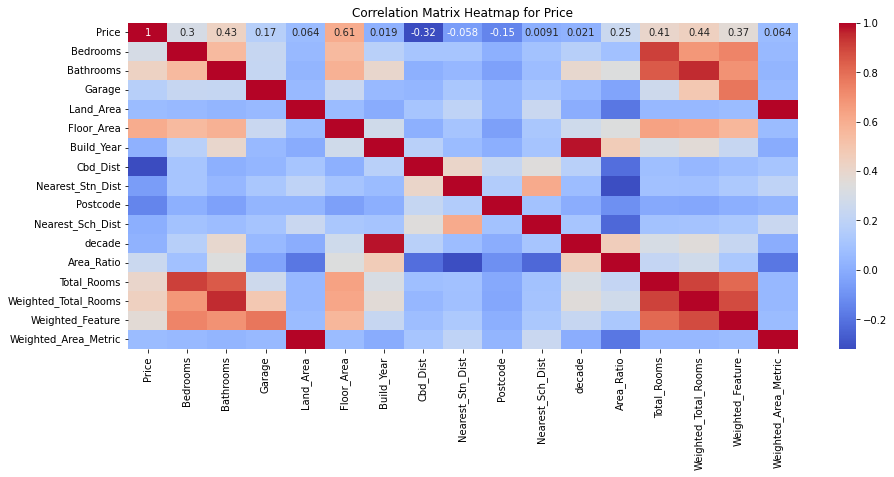

In [36]:
plt.figure(figsize=(15, 6))  # Set the figure size. You can adjust the numbers as needed.
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Price')
plt.show()


In [37]:
fig = px.scatter(df, x='Floor_Area', y='Price', hover_data=['Address', 'Bedrooms', 'Cbd_Dist'])
fig.show()


In [38]:
new_df = df[(df['Floor_Area'] >= 50) & (df['Floor_Area'] <= 350)]


In [39]:
# check new df correlation with price
df.corr()['Price'].sort_values(ascending=False)

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\3367073667.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Price                   1.000000
Floor_Area              0.605225
Weighted_Total_Rooms    0.439839
Bathrooms               0.430696
Total_Rooms             0.405399
Weighted_Feature        0.369413
Bedrooms                0.299019
Area_Ratio              0.251161
Garage                  0.172659
Weighted_Area_Metric    0.064330
Land_Area               0.064284
decade                  0.021409
Build_Year              0.018644
Nearest_Sch_Dist        0.009119
Nearest_Stn_Dist       -0.057970
Postcode               -0.145058
Cbd_Dist               -0.320893
Name: Price, dtype: float64

In [40]:
# check new df correlation with price
df.corr()['Weighted_Total_Rooms'].sort_values(ascending=False)

C:\Users\2much\AppData\Local\Temp\ipykernel_5548\1461451969.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Weighted_Total_Rooms    1.000000
Bathrooms               0.948964
Total_Rooms             0.903766
Weighted_Feature        0.884606
Bedrooms                0.675512
Floor_Area              0.624704
Garage                  0.485987
Price                   0.439839
Build_Year              0.360795
decade                  0.354576
Area_Ratio              0.272676
Nearest_Sch_Dist        0.099811
Nearest_Stn_Dist        0.084253
Weighted_Area_Metric    0.047020
Land_Area               0.046973
Cbd_Dist                0.040443
Postcode               -0.023714
Name: Weighted_Total_Rooms, dtype: float64

In [46]:
# save df as json
df.to_json('data/cleaned_v1.3.json', orient='records', lines=True)

In [2]:
df = pd.read_json('data/cleaned_v1.3.json', lines=True)

In [3]:
df

Address           Suburb    Price  Bedrooms  Bathrooms  \
0            1 Acorn Place       South Lake   565000         4          2   
1              1 Addis Way            Wandi   365000         3          2   
2          1 Ainsley Court          Camillo   287000         3          1   
3             1 Aman Place        Lockridge   325000         4          1   
4      1 Amethyst Crescent     Mount Richon   409000         4          2   
...                    ...              ...      ...       ...        ...   
25882  9B Teocote Crescent      Aubin Grove   423000         3          2   
25883      9B Viveash Road      Middle Swan   467000         4          2   
25884     9b Wesley Street  South Fremantle   955000         3          2   
25885       9C Gold Street  South Fremantle  1040000         4          3   
25886      9D Shalford Way       Girrawheen   295000         3          1   

       Garage  Land_Area  Floor_Area  Build_Year  Cbd_Dist  ... Date_Sold  \
0           2        600         160        2003      18.3  ...   09-2018   
1           2        351         139        2013      26.9  ...   02-2019   
2           1        719          86        1979      22.6  ...   06-2015   
3           2        466         131        1998      11.2  ...   11-2016   
4           1        759         118        1991      27.3  ...   03-2013   
...       ...        ...         ...         ...       ...  ...       ...   
25882       2        248         108        2011      24.9  ...   05-2016   
25883       2        400         132        2014      17.1  ...   04-2015   
25884       1        200         127        1997      16.0  ...   02-2019   
25885       2        292         245        2013      16.1  ...   03-2016   
25886       2        457          85        1974      12.6  ...   10-2016   

       Postcode                    Nearest_Sch  Nearest_Sch_Dist decade  \
0          6164    Lakeland Senior High School               0.8   2000   
1          6167                 Atwell College               5.5   2010   
2          6111   Kelmscott Senior High School               1.6   1970   
3          6054                  Kiara College               1.5   1990   
4          6112    Armadale Senior High School               1.2   1990   
...         ...                            ...               ...    ...   
25882      6164                 Atwell College               3.6   2010   
25883      6056               La Salle College               1.1   2010   
25884      6162              Fremantle College               1.1   1990   
25885      6162    Christian Brothers' College               1.4   2010   
25886      6064  Girrawheen Senior High School               0.4   1970   

       Area_Ratio  Total_Rooms  Weighted_Total_Rooms  Weighted_Feature  \
0        0.266667            6                  17.0              44.0   
1        0.396011            5                  16.0              38.5   
2        0.119611            4                   9.5              27.5   
3        0.281116            5                  11.5              38.5   
4        0.155468            6                  16.0              38.5   
...           ...          ...                   ...               ...   
25882    0.435484            5                  16.0              38.5   
25883    0.330000            6                  17.0              44.0   
25884    0.635000            5                  15.0              33.0   
25885    0.839041            7                  22.5              49.5   
25886    0.185996            4                  10.5              33.0   

       Weighted_Area_Metric  
0                    3316.0  
1                    1944.4  
2                    3963.1  
3                    2576.1  
4                    4186.3  
...                     ...  
25882                1374.8  
25883                2213.2  
25884                1112.7  
25885                1630.5  
25886                2522.0  

[25887 rows x 22 c

In [4]:
bins = [0, 10, 20, 30, 40, 50, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
df['Cbd_Dist_Binned'] = pd.cut(df['Cbd_Dist'], bins=bins, labels=labels)

In [5]:
df

Address           Suburb    Price  Bedrooms  Bathrooms  \
0            1 Acorn Place       South Lake   565000         4          2   
1              1 Addis Way            Wandi   365000         3          2   
2          1 Ainsley Court          Camillo   287000         3          1   
3             1 Aman Place        Lockridge   325000         4          1   
4      1 Amethyst Crescent     Mount Richon   409000         4          2   
...                    ...              ...      ...       ...        ...   
25882  9B Teocote Crescent      Aubin Grove   423000         3          2   
25883      9B Viveash Road      Middle Swan   467000         4          2   
25884     9b Wesley Street  South Fremantle   955000         3          2   
25885       9C Gold Street  South Fremantle  1040000         4          3   
25886      9D Shalford Way       Girrawheen   295000         3          1   

       Garage  Land_Area  Floor_Area  Build_Year  Cbd_Dist  ... Postcode  \
0           2        600         160        2003      18.3  ...     6164   
1           2        351         139        2013      26.9  ...     6167   
2           1        719          86        1979      22.6  ...     6111   
3           2        466         131        1998      11.2  ...     6054   
4           1        759         118        1991      27.3  ...     6112   
...       ...        ...         ...         ...       ...  ...      ...   
25882       2        248         108        2011      24.9  ...     6164   
25883       2        400         132        2014      17.1  ...     6056   
25884       1        200         127        1997      16.0  ...     6162   
25885       2        292         245        2013      16.1  ...     6162   
25886       2        457          85        1974      12.6  ...     6064   

                         Nearest_Sch Nearest_Sch_Dist  decade Area_Ratio  \
0        Lakeland Senior High School              0.8    2000   0.266667   
1                     Atwell College              5.5    2010   0.396011   
2       Kelmscott Senior High School              1.6    1970   0.119611   
3                      Kiara College              1.5    1990   0.281116   
4        Armadale Senior High School              1.2    1990   0.155468   
...                              ...              ...     ...        ...   
25882                 Atwell College              3.6    2010   0.435484   
25883               La Salle College              1.1    2010   0.330000   
25884              Fremantle College              1.1    1990   0.635000   
25885    Christian Brothers' College              1.4    2010   0.839041   
25886  Girrawheen Senior High School              0.4    1970   0.185996   

       Total_Rooms  Weighted_Total_Rooms  Weighted_Feature  \
0                6                  17.0              44.0   
1                5                  16.0              38.5   
2                4                   9.5              27.5   
3                5                  11.5              38.5   
4                6                  16.0              38.5   
...            ...                   ...               ...   
25882            5                  16.0              38.5   
25883            6                  17.0              44.0   
25884            5                  15.0              33.0   
25885            7                  22.5              49.5   
25886            4                  10.5              33.0   

       Weighted_Area_Metric  Cbd_Dist_Binned  
0                    3316.0            10-20  
1                    1944.4            20-30  
2                    3963.1            20-30  
3                    2576.1            10-20  
4                    4186.3            20-30  
...                     ...              ...  
25882                1374.8            20-30  
25883                2213.2            10-20  
25884                1112.7            10-20  
25885                1630.5            10-20  
25886 

# Model


In [55]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df[['Floor_Area', 'Weighted_Total_Rooms', 'Cbd_Dist','Area_Ratio','Nearest_Sch_Dist','Postcode']]  # Features
y = df['Price']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Evaluate each model using cross-validation and calculate RMSE
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} - Average RMSE: {np.mean(rmse_scores)}")


Linear Regression - Average RMSE: 242878.17213732694
Gradient Boosting - Average RMSE: 169102.8393371297
Random Forest - Average RMSE: 160036.41634837637


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit it to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding RMSE
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score (RMSE): {best_score}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Best cross-validation score (RMSE): 157061.18857858604


In [58]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model with the best parameters
model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=300,
    random_state=42
)

# Fit the model on the entire training dataset
model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=5, min_samples_split=4, n_estimators=300,
                          random_state=42)

In [59]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse_test}")


Test RMSE: 148709.72790307074


In [60]:
feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)


                Feature  Importance
0            Floor_Area    0.425701
5              Postcode    0.301133
2              Cbd_Dist    0.150972
3            Area_Ratio    0.067381
1  Weighted_Total_Rooms    0.036561
4      Nearest_Sch_Dist    0.018252


In [61]:
# Selecting samples for prediction
X_sample = X.iloc[0:10]
predicted_prices = model.predict(X_sample)

# Displaying predictions along with the difference
actual_prices = y.iloc[0:10].values
for i, (predicted, actual) in enumerate(zip(predicted_prices, actual_prices)):
    difference = predicted - actual
    print(f"Entry {i}: Predicted Price = ${predicted:.2f}, Actual Price = ${actual:.2f}, Difference = ${difference:.2f}")


Entry 0: Predicted Price = $489284.47, Actual Price = $565000.00, Difference = $-75715.53
Entry 1: Predicted Price = $420031.96, Actual Price = $365000.00, Difference = $55031.96
Entry 2: Predicted Price = $240437.93, Actual Price = $287000.00, Difference = $-46562.07
Entry 3: Predicted Price = $384022.37, Actual Price = $325000.00, Difference = $59022.37
Entry 4: Predicted Price = $336631.38, Actual Price = $409000.00, Difference = $-72368.62
Entry 5: Predicted Price = $340211.96, Actual Price = $400000.00, Difference = $-59788.04
Entry 6: Predicted Price = $322631.97, Actual Price = $370000.00, Difference = $-47368.03
Entry 7: Predicted Price = $642822.68, Actual Price = $565000.00, Difference = $77822.68
Entry 8: Predicted Price = $633931.65, Actual Price = $685000.00, Difference = $-51068.35
Entry 9: Predicted Price = $748298.23, Actual Price = $675000.00, Difference = $73298.23


In [62]:
# Predicting prices on the test set
predicted_prices = model.predict(X_test)

# Actual prices
actual_prices = y_test.values

# Calculate the number of successful predictions
successes = sum(abs(predicted - actual) <= 100000 for predicted, actual in zip(predicted_prices, actual_prices))

# Calculate the accuracy
accuracy = successes / len(predicted_prices) * 100

print(f"Accuracy (within $100k): {accuracy:.2f}%")

Accuracy (within $100k): 72.00%


In [157]:
import joblib

# Save the model
joblib.dump(model, 'models/model_v1.0.pkl')


['models/model_v1.0.pkl']

# New Model


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

features_to_scale = ['Floor_Area', 'Weighted_Total_Rooms', 'Area_Ratio', 'Nearest_Sch_Dist']

scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

X = df[['Floor_Area', 'Weighted_Total_Rooms', 'Cbd_Dist_Binned', 'Area_Ratio', 'Nearest_Sch_Dist', 'Postcode']]  # Features
y = df['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['Cbd_Dist_Binned'])],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} - Average RMSE: {np.mean(rmse_scores)}")

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_encoded, y_train)

best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score (RMSE): {best_score}")

Linear Regression - Average RMSE: 235305.8969990118
Gradient Boosting - Average RMSE: 171542.98665737588
Random Forest - Average RMSE: 165913.0876315943
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Best cross-validation score (RMSE): 161700.55669999545


In [16]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=200,
    random_state=42
)

model.fit(X_train_encoded, y_train)

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_encoded)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse_test}")

feature_importances = model.feature_importances_
features = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)

X_sample = X.iloc[0:10]
X_sample_encoded = preprocessor.transform(X_sample)
predicted_prices = model.predict(X_sample_encoded)

actual_prices = y.iloc[0:10].values
for i, (predicted, actual) in enumerate(zip(predicted_prices, actual_prices)):
    difference = predicted - actual
    print(f"Entry {i}: Predicted Price = ${predicted:.2f}, Actual Price = ${actual:.2f}, Difference = ${difference:.2f}")

predicted_prices = model.predict(X_test_encoded)
actual_prices = y_test.values

successes = sum(abs(predicted - actual) <= 100000 for predicted, actual in zip(predicted_prices, actual_prices))
accuracy = successes / len(predicted_prices) * 100

print(f"Accuracy (within $100k): {accuracy:.2f}%")

Test RMSE: 153723.53716508788
                            Feature  Importance
6             remainder__Floor_Area    0.441681
10              remainder__Postcode    0.365895
8             remainder__Area_Ratio    0.065031
0     encoder__Cbd_Dist_Binned_0-10    0.053543
7   remainder__Weighted_Total_Rooms    0.039099
9       remainder__Nearest_Sch_Dist    0.019632
1    encoder__Cbd_Dist_Binned_10-20    0.010759
3    encoder__Cbd_Dist_Binned_30-40    0.002109
2    encoder__Cbd_Dist_Binned_20-30    0.001273
5      encoder__Cbd_Dist_Binned_50+    0.000554
4    encoder__Cbd_Dist_Binned_40-50    0.000423
Entry 0: Predicted Price = $529085.84, Actual Price = $565000.00, Difference = $-35914.16
Entry 1: Predicted Price = $443496.74, Actual Price = $365000.00, Difference = $78496.74
Entry 2: Predicted Price = $267043.25, Actual Price = $287000.00, Difference = $-19956.75
Entry 3: Predicted Price = $383066.68, Actual Price = $325000.00, Difference = $58066.68
Entry 4: Predicted Price = $372413.8

### XGBoost


In [17]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Perform grid search
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search.fit(X_train_encoded, y_train)

# Get the best model
xgb_best_model = xgb_grid_search.best_estimator_

# Make predictions and evaluate the model
xgb_y_pred = xgb_best_model.predict(X_test_encoded)
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
print(f"XGBoost Test RMSE: {xgb_rmse_test}")

XGBoost Test RMSE: 150947.1504694085


In [18]:
# Predicting prices on the test set
xgb_predicted_prices = xgb_best_model.predict(X_test_encoded)

# Calculate the accuracy within 100k
xgb_accuracy = sum(abs(xgb_predicted_prices - y_test) <= 100000) / len(y_test) * 100
print(f"XGBoost Accuracy (within $100k): {xgb_accuracy:.2f}%")

XGBoost Accuracy (within $100k): 71.09%


### LightGBM

In [21]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for LightGBM
lgbm_param_grid = {
    'n_estimators': [200, 400, 600],  # Increase the values
    'learning_rate': [0.01, 0.05, 0.1],  # Reduce the values
    'max_depth': [5, 7, 9],
    'num_leaves': [31, 63, 127, 255],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the LightGBM model
lgbm_model = LGBMRegressor(random_state=42)

# Perform grid search
lgbm_grid_search = GridSearchCV(lgbm_model, lgbm_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_grid_search.fit(X_train_encoded, y_train)

# Get the best model
lgbm_best_model = lgbm_grid_search.best_estimator_

# Make predictions and evaluate the model
lgbm_y_pred = lgbm_best_model.predict(X_test_encoded)
lgbm_rmse_test = np.sqrt(mean_squared_error(y_test, lgbm_y_pred))
print(f"LightGBM Test RMSE: {lgbm_rmse_test}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 20709, number of used features: 11
[LightGBM] [Info] Start training from score 620774.610556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

In [23]:
# Predicting prices on the test set
lgbm_predicted_prices = lgbm_best_model.predict(X_test_encoded)

# Calculate the accuracy within 100k
lgbm_accuracy = sum(abs(lgbm_predicted_prices - y_test) <= 100000) / len(y_test) * 100
print(f"LightGBM Accuracy (within $100k): {lgbm_accuracy:.2f}%")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM Accuracy (within $100k): 71.61%


In [24]:
import joblib

# Save the model
joblib.dump(lgbm_best_model, 'models/lgbm_model_v1.0.pkl')


['models/lgbm_model_v1.0.pkl']